In [54]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
import tensorflow as tf
from tensorflow import keras

In [56]:
from tensorflow.keras.preprocessing.image import load_img

# 8.2 TensorFlow and Keras

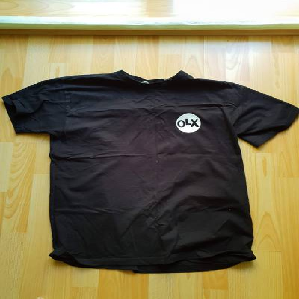

In [57]:
path = '../homework8-deep-learning/datasets/clothing-dataset-small-master/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))
img

In [58]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x2F1DEE650>


In [59]:
x = np.array(img)
x.shape

(299, 299, 3)

# 8.3 Pre-trained convolutional neural networks

In [60]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [61]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [62]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [63]:
X = preprocess_input(X)

In [64]:
pred = model.predict(X)
pred

1/1 [==============================] - 0s 420ms/step


array([[3.23711371e-04, 1.57383372e-04, 2.13492574e-04, 1.52370063e-04,
        2.47625605e-04, 3.05035122e-04, 3.20591178e-04, 1.47498868e-04,
        2.03621254e-04, 1.49271989e-04, 1.95662346e-04, 2.10136772e-04,
        7.59262039e-05, 1.13971888e-04, 1.62683064e-04, 2.04638010e-04,
        1.97415400e-04, 1.44288468e-04, 1.40217089e-04, 1.73685476e-04,
        7.46688165e-04, 2.56965781e-04, 2.66807940e-04, 2.96513346e-04,
        3.73601215e-04, 2.77403567e-04, 2.16570406e-04, 2.27269469e-04,
        3.80812038e-04, 1.72165455e-04, 3.05400259e-04, 1.96430759e-04,
        3.92114016e-04, 4.78070026e-04, 2.91750475e-04, 3.25692556e-04,
        1.47394821e-04, 1.62361612e-04, 2.12709943e-04, 1.34028014e-04,
        2.40069799e-04, 6.75210496e-04, 2.54942715e-04, 1.44478341e-04,
        4.12820373e-04, 2.04408061e-04, 3.02957458e-04, 1.49339190e-04,
        1.99653150e-04, 2.27005192e-04, 2.93728575e-04, 2.27444223e-04,
        6.37643156e-04, 7.82613875e-04, 2.49556702e-04, 4.052694

In [65]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196386),
  ('n02916936', 'bulletproof_vest', 0.03813994),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354206),
  ('n04525038', 'velvet', 0.0018453553)]]

# 8.5 Transfer Learning

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [67]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    '../homework8-deep-learning/datasets/clothing-dataset-small-master/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [68]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [69]:
X, y = next(train_ds)

In [70]:
X.shape

(32, 150, 150, 3)

In [71]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [72]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    '../homework8-deep-learning/datasets/clothing-dataset-small-master/validation',
    target_size=(150, 150),
    batch_size=32
)

Found 341 images belonging to 10 classes.


In [73]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [74]:
preds = model.predict(X)

1/1 [==============================] - 1s 513ms/step


In [75]:
preds

array([[-0.23083499, -0.30821908,  0.8896909 ,  0.65690106, -1.6447183 ,
        -0.535334  , -1.3902926 ,  1.1586277 ,  1.1043993 , -0.97084117],
       [-1.9785148 ,  0.32995158,  0.15866525,  0.28413874, -0.40026024,
         1.1784569 , -0.6175112 ,  0.6034546 ,  0.58433574, -0.5451647 ],
       [-1.7750664 ,  0.3505594 , -0.23795211, -0.3423136 ,  0.4951589 ,
         1.7457979 ,  0.40646255,  0.63690346,  0.9547171 , -1.1061038 ],
       [-0.44234264, -0.45042154,  0.31493068, -0.18096316, -0.67314225,
         0.17749566,  0.16667338, -0.00437614,  1.372877  ,  0.14610365],
       [ 0.12404896, -0.4240718 ,  0.5307681 ,  0.0666731 , -0.21650614,
         0.9154912 , -0.73021096,  0.96827066, -0.15834072, -0.10427207],
       [-0.81137884, -0.54123205,  0.13588993, -0.37779322,  0.46235666,
         0.32358614,  0.03440772,  0.22920287,  1.132244  ,  0.07261652],
       [-0.36870435, -0.5806134 , -0.26642534, -2.038287  ,  0.08167833,
        -0.0220207 , -0.32745638,  0.23455241

In [76]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [77]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 33s 334ms/step - loss: 1.3007 - accuracy: 0.6701 - val_loss: 0.7147 - val_accuracy: 0.7977
Epoch 2/10
96/96 [==============================] - 32s 334ms/step - loss: 0.5539 - accuracy: 0.8308 - val_loss: 0.7506 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 32s 334ms/step - loss: 0.3544 - accuracy: 0.8768 - val_loss: 0.9924 - val_accuracy: 0.7537
Epoch 4/10
96/96 [==============================] - 30s 314ms/step - loss: 0.2438 - accuracy: 0.9133 - val_loss: 0.8296 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 31s 322ms/step - loss: 0.1523 - accuracy: 0.9430 - val_loss: 0.8908 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 30s 315ms/step - loss: 0.1393 - accuracy: 0.9518 - val_loss: 1.0715 - val_accuracy: 0.7830
Epoch 7/10
96/96 [==============================] - 31s 321ms/step - loss: 0.0930 - accuracy: 0.9700 - val_loss: 0.9052 - val_accuracy: 0.8211

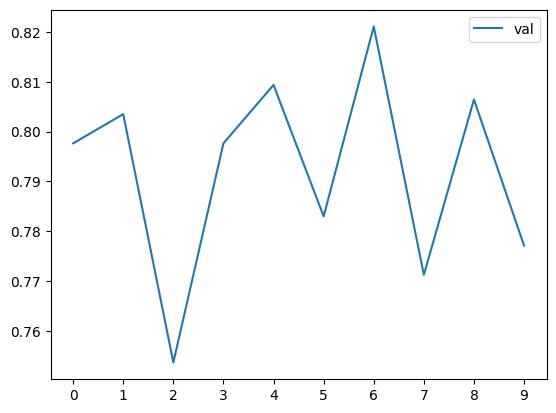

In [78]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# 8.6 Adjusting the learning rate

In [79]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [80]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001


Epoch 1/10
96/96 [==============================] - 32s 327ms/step - loss: 1.8525 - accuracy: 0.3696 - val_loss: 1.5469 - val_accuracy: 0.5367
Epoch 2/10
96/96 [==============================] - 31s 322ms/step - loss: 1.3262 - accuracy: 0.5971 - val_loss: 1.2180 - val_accuracy: 0.6364
Epoch 3/10
96/96 [==============================] - 31s 325ms/step - loss: 1.1007 - accuracy: 0.6587 - val_loss: 1.0518 - val_accuracy: 0.6891
Epoch 4/10
96/96 [==============================] - 33s 339ms/step - loss: 0.9731 - accuracy: 0.7057 - val_loss: 0.9475 - val_accuracy: 0.7331
Epoch 5/10
96/96 [==============================] - 31s 325ms/step - loss: 0.8870 - accuracy: 0.7288 - val_loss: 0.8740 - val_accuracy: 0.7331
Epoch 6/10
96/96 [==============================] - 31s 324ms/step - loss: 0.8235 - accuracy: 0.7428 - val_loss: 0.8298 - val_accuracy: 0.7478
Epoch 7/10
96/96 [==============================] - 31s 325ms/step - loss: 0.7750 - accuracy: 0.7595 - val_loss: 0.7853 - val_accuracy: 0.7742

Epoch 1/10
96/96 [==============================] - 33s 331ms/step - loss: 1.1193 - accuracy: 0.6248 - val_loss: 0.7280 - val_accuracy: 0.7977
Epoch 2/10
96/96 [==============================] - 32s 332ms/step - loss: 0.6334 - accuracy: 0.7803 - val_loss: 0.6380 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 31s 326ms/step - loss: 0.5086 - accuracy: 0.8312 - val_loss: 0.6189 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 33s 347ms/step - loss: 0.4352 - accuracy: 0.8533 - val_loss: 0.5639 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 32s 335ms/step - loss: 0.3730 - accuracy: 0.8866 - val_loss: 0.5736 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 30s 315ms/step - loss: 0.3340 - accuracy: 0.9006 - val_loss: 0.5496 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 31s 325ms/step - loss: 0.2944 - accuracy: 0.9172 - val_loss: 0.5418 - val_accuracy: 0.8358

Epoch 1/10
96/96 [==============================] - 33s 337ms/step - loss: 1.2655 - accuracy: 0.6630 - val_loss: 0.9538 - val_accuracy: 0.7155
Epoch 2/10
96/96 [==============================] - 31s 326ms/step - loss: 0.6232 - accuracy: 0.8103 - val_loss: 0.8014 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 30s 317ms/step - loss: 0.3597 - accuracy: 0.8729 - val_loss: 1.0091 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 31s 326ms/step - loss: 0.2538 - accuracy: 0.9058 - val_loss: 0.9197 - val_accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 32s 331ms/step - loss: 0.2107 - accuracy: 0.9211 - val_loss: 0.8319 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 31s 324ms/step - loss: 0.1167 - accuracy: 0.9586 - val_loss: 0.8711 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 30s 318ms/step - loss: 0.0941 - accuracy: 0.9658 - val_loss: 1.0858 - val_accuracy: 0.7830

Epoch 1/10
96/96 [==============================] - 33s 333ms/step - loss: 11.1168 - accuracy: 0.6248 - val_loss: 6.5924 - val_accuracy: 0.7449
Epoch 2/10
96/96 [==============================] - 32s 333ms/step - loss: 4.6165 - accuracy: 0.7731 - val_loss: 8.0045 - val_accuracy: 0.7595
Epoch 3/10
96/96 [==============================] - 31s 327ms/step - loss: 3.6368 - accuracy: 0.8233 - val_loss: 7.9597 - val_accuracy: 0.7537
Epoch 4/10
96/96 [==============================] - 31s 326ms/step - loss: 3.4331 - accuracy: 0.8422 - val_loss: 7.7182 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 31s 322ms/step - loss: 2.3107 - accuracy: 0.8882 - val_loss: 11.0873 - val_accuracy: 0.7390
Epoch 6/10
96/96 [==============================] - 32s 328ms/step - loss: 1.7805 - accuracy: 0.9045 - val_loss: 7.6090 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 30s 315ms/step - loss: 1.5457 - accuracy: 0.9188 - val_loss: 9.5881 - val_accuracy: 0.79

In [81]:
del scores[0.1]
del scores[0.0001]

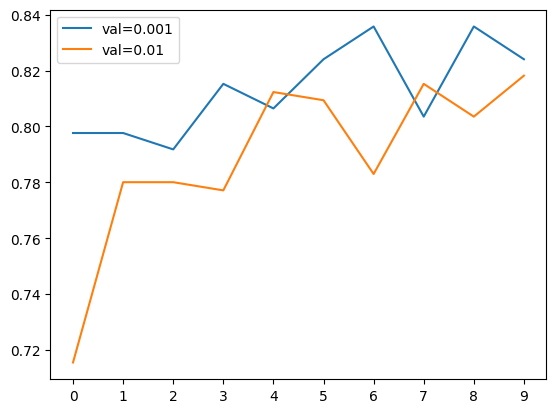

In [82]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [83]:
learning_rate = 0.001

# 8.7 Checkpointing

In [84]:
# model.save_weights('model_v1.keras')

In [85]:
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',  # Dynamic filename
    save_best_only=True,  # Save only the best-performing model
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Save when validation accuracy is maximized
    verbose=1  # Print messages when saving
)

In [86]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.1196 - accuracy: 0.6190
Epoch 1: val_accuracy improved from -inf to 0.78592, saving model to xception_v1_01_0.786.keras
96/96 [==============================] - 32s 328ms/step - loss: 1.1196 - accuracy: 0.6190 - val_loss: 0.7074 - val_accuracy: 0.7859
Epoch 2/10
96/96 [==============================] - ETA: 0s - loss: 0.6382 - accuracy: 0.7865
Epoch 2: val_accuracy improved from 0.78592 to 0.80645, saving model to xception_v1_02_0.806.keras
96/96 [==============================] - 31s 319ms/step - loss: 0.6382 - accuracy: 0.7865 - val_loss: 0.6194 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.8289
Epoch 3: val_accuracy did not improve from 0.80645
96/96 [==============================] - 30s 315ms/step - loss: 0.5195 - accuracy: 0.8289 - val_loss: 0.5999 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - ETA: 0s - loss: 0.4356 -

# 8.8 Adding more layers

In [87]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [88]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10


Epoch 1/10
96/96 [==============================] - 31s 313ms/step - loss: 1.4864 - accuracy: 0.4945 - val_loss: 1.0619 - val_accuracy: 0.6481
Epoch 2/10
96/96 [==============================] - 30s 311ms/step - loss: 0.8363 - accuracy: 0.7229 - val_loss: 0.7827 - val_accuracy: 0.7419
Epoch 3/10
96/96 [==============================] - 35s 361ms/step - loss: 0.6277 - accuracy: 0.7930 - val_loss: 0.6887 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 31s 322ms/step - loss: 0.5219 - accuracy: 0.8305 - val_loss: 0.6213 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 30s 318ms/step - loss: 0.4464 - accuracy: 0.8644 - val_loss: 0.6196 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 31s 323ms/step - loss: 0.3862 - accuracy: 0.8846 - val_loss: 0.5953 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 31s 325ms/step - loss: 0.3373 - accuracy: 0.9042 - val_loss: 0.5878 - val_accuracy: 0.8006

Epoch 1/10
96/96 [==============================] - 36s 366ms/step - loss: 0.9506 - accuracy: 0.6721 - val_loss: 0.6370 - val_accuracy: 0.7918
Epoch 2/10
96/96 [==============================] - 35s 368ms/step - loss: 0.4944 - accuracy: 0.8299 - val_loss: 0.6508 - val_accuracy: 0.7742
Epoch 3/10
96/96 [==============================] - 32s 338ms/step - loss: 0.3438 - accuracy: 0.8875 - val_loss: 0.5417 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 43s 444ms/step - loss: 0.2290 - accuracy: 0.9338 - val_loss: 0.5544 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 41s 422ms/step - loss: 0.1699 - accuracy: 0.9544 - val_loss: 0.5779 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 44s 460ms/step - loss: 0.1144 - accuracy: 0.9743 - val_loss: 0.5585 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 44s 458ms/step - loss: 0.0812 - accuracy: 0.9866 - val_loss: 0.5910 - val_accuracy: 0.8240

Epoch 1/10
96/96 [==============================] - 30s 302ms/step - loss: 0.9625 - accuracy: 0.6816 - val_loss: 0.6511 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 28s 293ms/step - loss: 0.4330 - accuracy: 0.8426 - val_loss: 0.5955 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 28s 293ms/step - loss: 0.2619 - accuracy: 0.9117 - val_loss: 0.6134 - val_accuracy: 0.8182
Epoch 4/10
96/96 [==============================] - 28s 295ms/step - loss: 0.1581 - accuracy: 0.9511 - val_loss: 0.5902 - val_accuracy: 0.8240
Epoch 5/10
96/96 [==============================] - 28s 294ms/step - loss: 0.0728 - accuracy: 0.9831 - val_loss: 0.6038 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 28s 292ms/step - loss: 0.0365 - accuracy: 0.9951 - val_loss: 0.6467 - val_accuracy: 0.8416
Epoch 7/10
96/96 [==============================] - 28s 294ms/step - loss: 0.0386 - accuracy: 0.9915 - val_loss: 0.7720 - val_accuracy: 0.7977

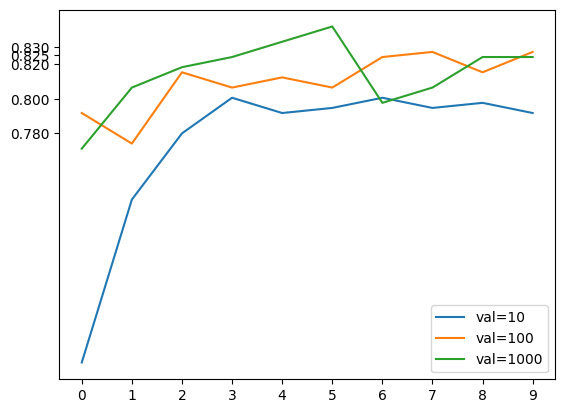

In [89]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

# 8.9 Regularization and dropout

In [90]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [91]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0


Epoch 1/30
96/96 [==============================] - 29s 293ms/step - loss: 0.9755 - accuracy: 0.6796 - val_loss: 0.6398 - val_accuracy: 0.7918
Epoch 2/30
96/96 [==============================] - 28s 288ms/step - loss: 0.5072 - accuracy: 0.8233 - val_loss: 0.5558 - val_accuracy: 0.8240
Epoch 3/30
96/96 [==============================] - 28s 290ms/step - loss: 0.3506 - accuracy: 0.8846 - val_loss: 0.6428 - val_accuracy: 0.7859
Epoch 4/30
96/96 [==============================] - 28s 287ms/step - loss: 0.2417 - accuracy: 0.9276 - val_loss: 0.5932 - val_accuracy: 0.7947
Epoch 5/30
96/96 [==============================] - 28s 290ms/step - loss: 0.1873 - accuracy: 0.9439 - val_loss: 0.5535 - val_accuracy: 0.8152
Epoch 6/30
96/96 [==============================] - 28s 294ms/step - loss: 0.1200 - accuracy: 0.9726 - val_loss: 0.5682 - val_accuracy: 0.8123
Epoch 7/30
96/96 [==============================] - 29s 307ms/step - loss: 0.0773 - accuracy: 0.9899 - val_loss: 0.5658 - val_accuracy: 0.8358

Epoch 1/30
96/96 [==============================] - 30s 305ms/step - loss: 1.0928 - accuracy: 0.6291 - val_loss: 0.6698 - val_accuracy: 0.7801
Epoch 2/30
96/96 [==============================] - 29s 298ms/step - loss: 0.6368 - accuracy: 0.7885 - val_loss: 0.6125 - val_accuracy: 0.7947
Epoch 3/30
96/96 [==============================] - 29s 300ms/step - loss: 0.4660 - accuracy: 0.8374 - val_loss: 0.5743 - val_accuracy: 0.7947
Epoch 4/30
96/96 [==============================] - 29s 305ms/step - loss: 0.3749 - accuracy: 0.8686 - val_loss: 0.5652 - val_accuracy: 0.8123
Epoch 5/30
96/96 [==============================] - 29s 300ms/step - loss: 0.2766 - accuracy: 0.9084 - val_loss: 0.5819 - val_accuracy: 0.7918
Epoch 6/30
96/96 [==============================] - 29s 300ms/step - loss: 0.2218 - accuracy: 0.9267 - val_loss: 0.5807 - val_accuracy: 0.8035
Epoch 7/30
96/96 [==============================] - 29s 301ms/step - loss: 0.1781 - accuracy: 0.9452 - val_loss: 0.5440 - val_accuracy: 0.8328

Epoch 1/30
96/96 [==============================] - 29s 298ms/step - loss: 1.3013 - accuracy: 0.5756 - val_loss: 0.7821 - val_accuracy: 0.7683
Epoch 2/30
96/96 [==============================] - 28s 295ms/step - loss: 0.8608 - accuracy: 0.7047 - val_loss: 0.6848 - val_accuracy: 0.7742
Epoch 3/30
96/96 [==============================] - 29s 302ms/step - loss: 0.6925 - accuracy: 0.7546 - val_loss: 0.6178 - val_accuracy: 0.7977
Epoch 4/30
96/96 [==============================] - 28s 296ms/step - loss: 0.5977 - accuracy: 0.7969 - val_loss: 0.6098 - val_accuracy: 0.7771
Epoch 5/30
96/96 [==============================] - 28s 296ms/step - loss: 0.5188 - accuracy: 0.8246 - val_loss: 0.5698 - val_accuracy: 0.8123
Epoch 6/30
96/96 [==============================] - 28s 297ms/step - loss: 0.4781 - accuracy: 0.8318 - val_loss: 0.6414 - val_accuracy: 0.7713
Epoch 7/30
96/96 [==============================] - 28s 295ms/step - loss: 0.4079 - accuracy: 0.8621 - val_loss: 0.5585 - val_accuracy: 0.8094

Epoch 1/30
96/96 [==============================] - 34s 346ms/step - loss: 1.7770 - accuracy: 0.3797 - val_loss: 1.1579 - val_accuracy: 0.6804
Epoch 2/30
96/96 [==============================] - 32s 337ms/step - loss: 1.3914 - accuracy: 0.5091 - val_loss: 0.9614 - val_accuracy: 0.7243
Epoch 3/30
96/96 [==============================] - 32s 328ms/step - loss: 1.2641 - accuracy: 0.5375 - val_loss: 0.8697 - val_accuracy: 0.7449
Epoch 4/30
96/96 [==============================] - 32s 334ms/step - loss: 1.1848 - accuracy: 0.5743 - val_loss: 0.7878 - val_accuracy: 0.7683
Epoch 5/30
96/96 [==============================] - 31s 322ms/step - loss: 1.0930 - accuracy: 0.6014 - val_loss: 0.7425 - val_accuracy: 0.7801
Epoch 6/30
96/96 [==============================] - 31s 319ms/step - loss: 1.0588 - accuracy: 0.6154 - val_loss: 0.7556 - val_accuracy: 0.7595
Epoch 7/30
96/96 [==============================] - 33s 340ms/step - loss: 1.0314 - accuracy: 0.6199 - val_loss: 0.7091 - val_accuracy: 0.7830

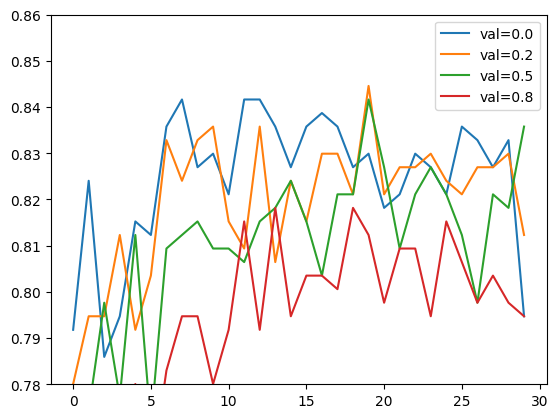

In [92]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

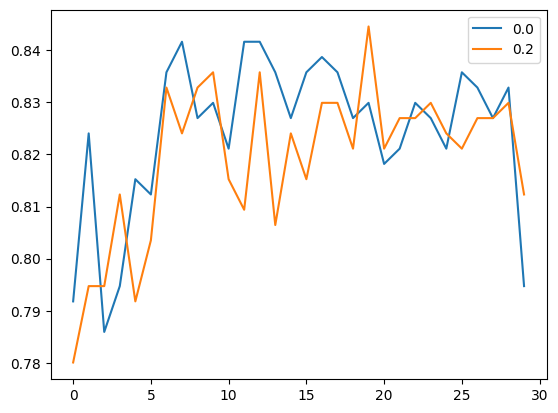

In [95]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

# 8.10 Data augmentation

In [96]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '../homework8-deep-learning/datasets/clothing-dataset-small-master/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '../homework8-deep-learning/datasets/clothing-dataset-small-master/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [97]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 32s 324ms/step - loss: 1.0379 - accuracy: 0.6548 - val_loss: 0.7224 - val_accuracy: 0.7801
Epoch 2/50
96/96 [==============================] - 31s 328ms/step - loss: 0.6296 - accuracy: 0.7819 - val_loss: 0.6056 - val_accuracy: 0.7977
Epoch 3/50
96/96 [==============================] - 30s 309ms/step - loss: 0.4591 - accuracy: 0.8475 - val_loss: 0.5623 - val_accuracy: 0.8182
Epoch 4/50
96/96 [==============================] - 29s 304ms/step - loss: 0.3667 - accuracy: 0.8748 - val_loss: 0.5993 - val_accuracy: 0.7947
Epoch 5/50
96/96 [==============================] - 30s 309ms/step - loss: 0.2785 - accuracy: 0.9140 - val_loss: 0.5459 - val_accuracy: 0.8123
Epoch 6/50
96/96 [==============================] - 29s 306ms/step - loss: 0.2146 - accuracy: 0.9384 - val_loss: 0.5894 - val_accuracy: 0.8152
Epoch 7/50
96/96 [==============================] - 29s 304ms/step - loss: 0.1798 - accuracy: 0.9465 - val_loss: 0.5797 - val_accuracy: 0.8035

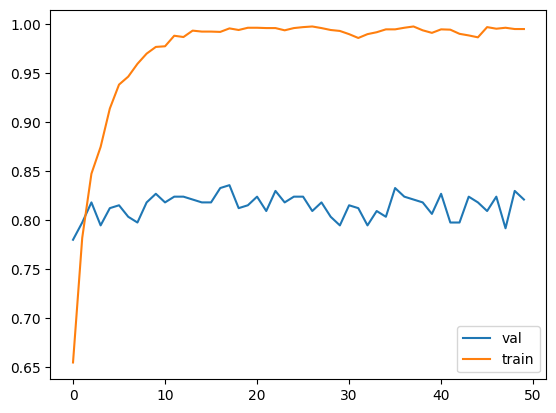

In [98]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# 8.11 Training a larger model

In [99]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [100]:
input_size = 299

In [101]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    '../homework8-deep-learning/datasets/clothing-dataset-small-master/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    '../homework8-deep-learning/datasets/clothing-dataset-small-master/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [102]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [103]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 154s 2s/step - loss: 0.9533 - accuracy: 0.7031 - val_loss: 0.5554 - val_accuracy: 0.8387
Epoch 2/50
96/96 [==============================] - 121s 1s/step - loss: 0.5154 - accuracy: 0.8302 - val_loss: 0.4854 - val_accuracy: 0.8358
Epoch 3/50
96/96 [==============================] - 119s 1s/step - loss: 0.4291 - accuracy: 0.8569 - val_loss: 0.4134 - val_accuracy: 0.8592
Epoch 4/50
96/96 [==============================] - 117s 1s/step - loss: 0.3769 - accuracy: 0.8745 - val_loss: 0.4015 - val_accuracy: 0.8651
Epoch 5/50
96/96 [==============================] - 119s 1s/step - loss: 0.3493 - accuracy: 0.8817 - val_loss: 0.3989 - val_accuracy: 0.8680
Epoch 6/50
96/96 [==============================] - 125s 1s/step - loss: 0.3108 - accuracy: 0.8866 - val_loss: 0.4161 - val_accuracy: 0.8622
Epoch 7/50
96/96 [==============================] - 122s 1s/step - loss: 0.2932 - accuracy: 0.9061 - val_loss: 0.3621 - val_accuracy: 0.8798
Epoch 8/50
96

# 8.12 Using the model

In [104]:
import tensorflow as tf
from tensorflow import keras

In [105]:

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img

from keras.applications.xception import preprocess_input

# from keras.src.utils import image_dataset_from_directory
# from keras.src.utils import load_img

# from keras.src.applications.xception import preprocess_input

In [106]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '../homework8-deep-learning/datasets/clothing-dataset-small-master/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [108]:
model = keras.models.load_model('xception_v4_1_26_0.903.keras')

In [109]:
model.evaluate(test_ds)

12/12 [==============================] - 16s 1s/step - loss: 0.2901 - accuracy: 0.8978


[0.290066659450531, 0.897849440574646]

In [110]:
path = '../homework8-deep-learning/datasets/clothing-dataset-small-master/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

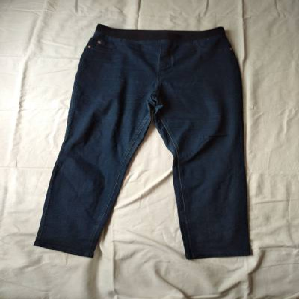

In [111]:
img = load_img(path, target_size=(299, 299))
img

In [112]:
import numpy as np

In [113]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [114]:
X = preprocess_input(X)
pred = model.predict(X)
pred

1/1 [==============================] - 0s 415ms/step


array([[-1.8236407, -7.03868  , -2.4036963, -3.2937407,  9.786295 ,
        -1.907603 , -6.0642586,  3.5127506, -5.218904 , -2.9898345]],
      dtype=float32)

In [115]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [116]:
dict(zip(classes, pred[0]))

{'dress': -1.8236407,
 'hat': -7.03868,
 'longsleeve': -2.4036963,
 'outwear': -3.2937407,
 'pants': 9.786295,
 'shirt': -1.907603,
 'shoes': -6.0642586,
 'shorts': 3.5127506,
 'skirt': -5.218904,
 't-shirt': -2.9898345}